### `Project - MovieLens Data Analysis`

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.


### `Objective:`
- To implement the techniques learnt as a part of the course.

### `Learning Outcomes:`
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


### `Domain` 
- Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

In [ ]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = 'REPLACE_WITH_YOUR_FILE_ID'
downloaded = drive.CreateFile({'id': file_id})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))

### `Datasets Information:`


*rating.csv:* It contains information on ratings given by the users to a particular movie.
- user id: id assigned to every user
- movie id: id assigned to every movie
- rating: rating given by the user
- timestamp: Time recorded when the user gave a rating



*movie.csv:* File contains information related to the movies and their genre.
- movie id: id assigned to every movie
- movie title: Title of the movie
- release date: Date of release of the movie
- Action: Genre containing binary values (1 - for action 0 - not action)
- Adventure: Genre containing binary values (1 - for adventure 0 - not adventure)
- Animation: Genre containing binary values (1 - for animation 0 - not animation)
- Children’s: Genre containing binary values (1 - for children's 0 - not children's)
- Comedy: Genre containing binary values (1 - for comedy 0 - not comedy)
- Crime: Genre containing binary values (1 - for crime 0 - not crime)
- Documentary: Genre containing binary values (1 - for documentary 0 - not documentary)
- Drama: Genre containing binary values (1 - for drama 0 - not drama)
- Fantasy: Genre containing binary values (1 - for fantasy 0 - not fantasy)
- Film-Noir: Genre containing binary values (1 - for film-noir 0 - not film-noir)
- Horror: Genre containing binary values (1 - for horror 0 - not horror)
- Musical: Genre containing binary values (1 - for musical 0 - not musical)
- Mystery: Genre containing binary values (1 - for mystery 0 - not mystery)
- Romance: Genre containing binary values (1 - for romance 0 - not romance)
- Sci-Fi: Genre containing binary values (1 - for sci-fi 0 - not sci-fi)
- Thriller: Genre containing binary values (1 - for thriller 0 - not thriller)
- War: Genre containing binary values (1 - for war 0 - not war)
- Western: Genre containing binary values (1 - for western - not western)



*user.csv:* It contains information of the users who have rated the movies.
- user id: id assigned to every user
- age: Age of the user
- gender: Gender of the user
- occupation: Occupation of the user
- zip code: Zip code of the use


**`Please provide you insights wherever necessary.`**

### 1. Import the necessary packages - 2.5 marks

In [5]:
# all necessary library is imported
# Pandas imported to create dataframe from the given dataset
import pandas as pd
#numpy is imported for arithmatic operations
import numpy as np
#seaborn and matplotlib are visualisation library to plot graph
import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib inline sets the backend of matplotlib to the 'inline' backend
%matplotlib inline 



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### 2. Read the 3 datasets into dataframes - 2.5 marks

In [6]:
#Create a dataframes from the csv files 
df_item = pd.read_csv('/content/sample_data/item.csv')
df_Data = pd.read_csv('/content/sample_data/Data.csv')
df_user = pd.read_csv('/content/sample_data/user.csv')




### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks
 - Note that you will need to do it for all the three datasets seperately

In [ ]:
#info() function is used to get a concise summary
df_Data.info()
#Describing all columns of a DataFrame regardless of data type
df_Data.describe()
#Return a tuple representing the dimensionality of the DataFrame for (Data)
df_Data.shape
#identifying the missing data in a dataset using isnull function and its total count
null_data = df_Data.isnull().sum()
print("Data null values :",null_data)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
Data null values : user id      0
movie id     0
rating       0
timestamp    0
dtype: int64


In [ ]:
#info() function is used to get a concise summary
df_item.info()
#Describing all columns of a DataFrame regardless of data type
df_item.describe()
#Return a tuple representing the dimensionality of the DataFrame(Item)
df_item.shape
null_item = df_item.isnull().sum()
print("Item null values :",null_item)
df_item.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [ ]:
#info() function is used to get a concise summary
df_user.info()
#Describing all columns of a DataFrame regardless of data type
df_user.describe()
#Return a tuple representing the dimensionality of the DataFrame(User)
df_user.shape
null_user = df_user.isnull().sum()
print("user null values :",null_user)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB
user null values : user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64


### 4. Find the number of movies per genre using the item data - 2.5 marks

In [ ]:
# Getting the coumt by grouping induvidually all genre and computing total number of movies per genre
Action= df_item.groupby('Action')
print("Action Movie Count : ", Action['Action'].count()[1])

Adventure = df_item.groupby('Adventure')
print("Adventure Movie Count : ",Adventure['Adventure'].count()[1])

Animation = df_item.groupby('Animation')
print("Animation Movie Count : ",Animation['Animation'].count()[1])

Childrens = df_item.groupby('Childrens')
print("Childrens Movie Count : ",Childrens['Childrens'].count()[1])

Comedy = df_item.groupby('Comedy')
print("Comedy Movie Count : ",Comedy['Comedy'].count()[1])

Crime = df_item.groupby('Crime')
print("Crime Movie Count : ",Crime['Crime'].count()[1])

Documentary = df_item.groupby('Documentary')
print("Documentary Movie Count : ",Documentary['Documentary'].count()[1])

Drama = df_item.groupby('Drama')
print("Drama Movie Count : ",Drama['Drama'].count()[1])

Fantasy = df_item.groupby('Fantasy')
print("Fantasy Movie Count : ",Fantasy['Fantasy'].count()[1])

Film_Noir = df_item.groupby('Film-Noir')
print("Film-Noir Movie Count : ",Film_Noir['Film-Noir'].count()[1])

Horror = df_item.groupby('Horror')
print("Horror Movie Count : ",Horror['Horror'].count()[1])

Musical = df_item.groupby('Musical')
print("Musical Movie Count : ",Musical['Musical'].count()[1])

Mystery = df_item.groupby('Mystery')
print("Mystery Movie Count : ",Mystery['Mystery'].count()[1])

Romance = df_item.groupby('Romance')
print("Romance Movie Count : ",Romance['Romance'].count()[1])

Sci_Fi = df_item.groupby('Sci-Fi')
print("Sci-Fi Movie Count : ",Sci_Fi['Sci-Fi'].count()[1])

Thriller = df_item.groupby('Thriller')
print("Thriller Movie Count : ",Thriller['Thriller'].count()[1])

War = df_item.groupby('War')
print("War Movie Count : ",War['War'].count()[1])

Western = df_item.groupby('Western')
print("Western Movie Count : ",Western['Western'].count()[1])



Action Movie Count :  251
Adventure Movie Count :  135
Animation Movie Count :  42
Childrens Movie Count :  122
Comedy Movie Count :  505
Crime Movie Count :  109
Documentary Movie Count :  50
Drama Movie Count :  725
Fantasy Movie Count :  22
Film-Noir Movie Count :  24
Horror Movie Count :  92
Musical Movie Count :  56
Mystery Movie Count :  61
Romance Movie Count :  247
Sci-Fi Movie Count :  101
Thriller Movie Count :  251
War Movie Count :  71
Western Movie Count :  27


### 5. Drop the movie where the genre is unknown - 2.5 marks

In [ ]:
#Finding the index of the 'unknown' genre records
unk = df_item[df_item['unknown'] == 1].index
# drop the unkown genre records
df_item.drop(unk)
# only one record is found with genre as unknown and it is been dropped 

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1678,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1679,1681,You So Crazy,01-Jan-1994,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


### 6. Find the movies that have more than one genre - 5 marks

hint: use sum on the axis = 1

Display movie name, number of genres for the movie in dataframe

and also print(total number of movies which have more than one genres)

In [ ]:
#Create genre column list
df_item_col = ['Action',	'Adventure',	'Animation',	'Childrens',	'Comedy',	'Crime',	'Documentary','Drama',	'Fantasy',	'Film-Noir',	'Horror',	'Musical',	'Mystery',	'Romance',	'Sci-Fi',	'Thriller',	'War',	'Western']
# Finding the total number of movies having more than one genre 
df_item['totalgenre']=df_item.loc[:,df_item_col].sum(axis=1)
print(df_item[['movie title','totalgenre']])

val = len(df_item[df_item.totalgenre>1])
print("Total Number of Movies where total genre is greater than 1 : ",val)

                              movie title  totalgenre
0                              Toy Story            3
1                              GoldenEye            3
2                             Four Rooms            1
3                             Get Shorty            3
4                                Copycat            3
...                                   ...         ...
1676                          Mat' i syn            1
1677                           B. Monkey            2
1678                       Sliding Doors            2
1679                        You So Crazy            1
1680  Scream of Stone (Schrei aus Stein)            1

[1681 rows x 2 columns]
Total Number of Movies where total genre is greater than 1 :  849


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

*HINT: Use distplot for age. Use lineplot or countplot for release year.*

*HINT: Plot percentages in y-axis and categories in x-axis for ratings, gender and occupation*

*HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split() as depicted below or you could convert it to pandas datetime format and extract year (.dt.year)*

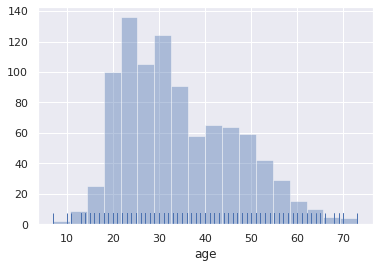

In [ ]:
import pandas as pd
import seaborn as sns   # Why sns?  It's a reference to The West Wing
import matplotlib.pyplot as plt  # seaborn is based on matplotlib
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline 
# create a dataframe from the user.csv file
user = pd.read_csv('/content/sample_data/user.csv')
# using seaborn plot a distplot(univariate graph against age
sns.distplot(user['age'], kde=False, rug=True);
# higher Number of movie watcher lies between the age group of 25 to 30

[Text(0, 0, '1922'),
 Text(0, 0, '1926'),
 Text(0, 0, '1930'),
 Text(0, 0, '1931'),
 Text(0, 0, '1932'),
 Text(0, 0, '1933'),
 Text(0, 0, '1934'),
 Text(0, 0, '1935'),
 Text(0, 0, '1936'),
 Text(0, 0, '1937'),
 Text(0, 0, '1938'),
 Text(0, 0, '1939'),
 Text(0, 0, '1940'),
 Text(0, 0, '1941'),
 Text(0, 0, '1942'),
 Text(0, 0, '1943'),
 Text(0, 0, '1944'),
 Text(0, 0, '1945'),
 Text(0, 0, '1946'),
 Text(0, 0, '1947'),
 Text(0, 0, '1948'),
 Text(0, 0, '1949'),
 Text(0, 0, '1950'),
 Text(0, 0, '1951'),
 Text(0, 0, '1952'),
 Text(0, 0, '1953'),
 Text(0, 0, '1954'),
 Text(0, 0, '1955'),
 Text(0, 0, '1956'),
 Text(0, 0, '1957'),
 Text(0, 0, '1958'),
 Text(0, 0, '1959'),
 Text(0, 0, '1960'),
 Text(0, 0, '1961'),
 Text(0, 0, '1962'),
 Text(0, 0, '1963'),
 Text(0, 0, '1964'),
 Text(0, 0, '1965'),
 Text(0, 0, '1966'),
 Text(0, 0, '1967'),
 Text(0, 0, '1968'),
 Text(0, 0, '1969'),
 Text(0, 0, '1970'),
 Text(0, 0, '1971'),
 Text(0, 0, '1972'),
 Text(0, 0, '1973'),
 Text(0, 0, '1974'),
 Text(0, 0, '

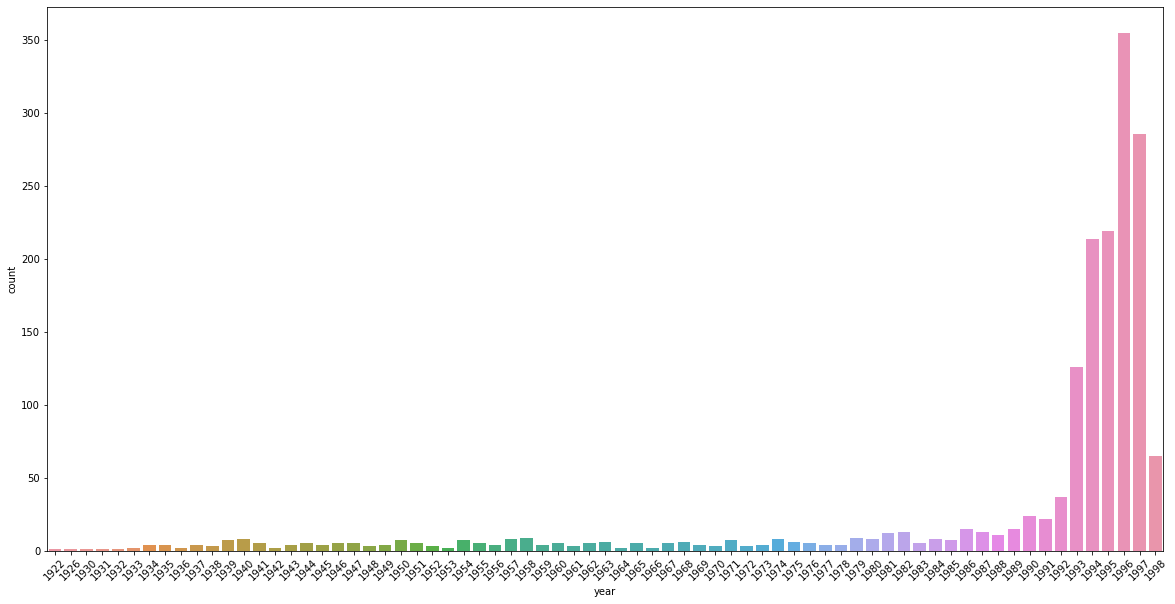

In [19]:
# set the plot's figure size
plt.figure(figsize=(20,10))
# using datetimeindex getting the year alone from release datE
df_item['year']= pd.DatetimeIndex(df_item['release date']).year
#Using seaborn draw the count plot
chart_year=sns.countplot(df_item['year']);
chart_year.set_xticklabels(chart_year.get_xticklabels(),rotation=45)

Text(0, 0.5, 'Percent')

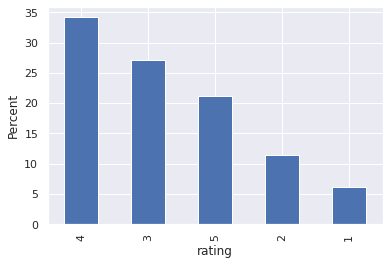

In [ ]:

#bar plot between rating vs percentage using normalised value of total counts
df_Data['rating'].value_counts(normalize=True).mul(100).plot(kind='bar')
# naming conventions for x and y axis
plt.xlabel("rating")
plt.ylabel("Percent")
#inference from the below graphg is mejority of the audience has given higher ratings for the movies


Text(0, 0.5, 'Percent')

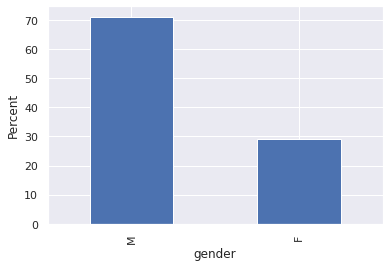

In [ ]:

#bar plot between gender vs percentage using normalised value of total counts
df_user['gender'].value_counts(normalize=True).mul(100).plot(kind='bar')
# give the lables for x and y axis
plt.xlabel("gender")
plt.ylabel("Percent")
#inference from the below bar graph is male watches 100% over female

Text(0, 0.5, 'Percent')

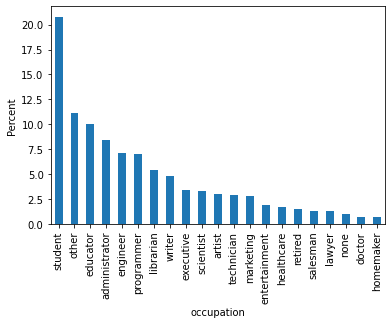

In [ ]:

#bar plot between occupation vs percentage using normalised value of total counts
df_user['occupation'].value_counts(normalize=True).mul(100).plot(kind='bar')
# give the lables for x and y axis
plt.xlabel("occupation")
plt.ylabel("Percent")
#inference from the below graph is mejority of the movie watchers are students

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the **percent of number of releases in a year** as a parameter of popularity of a genre

Hint 1: You need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa. (Drop unnecessary column if there are any)

Hint 2: Find the total number of movies release in a year(use `sum(axis=1)` store that value in a new column as 'total'). Now divide the value of each genre in that year by total to get percentage number of release in a particular year.
`(df.div(df['total'], axis= 0) * 100)`

Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 3: Use groupby on the relevant column and use sum() on the same to find out the number of releases in a year/genre.  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


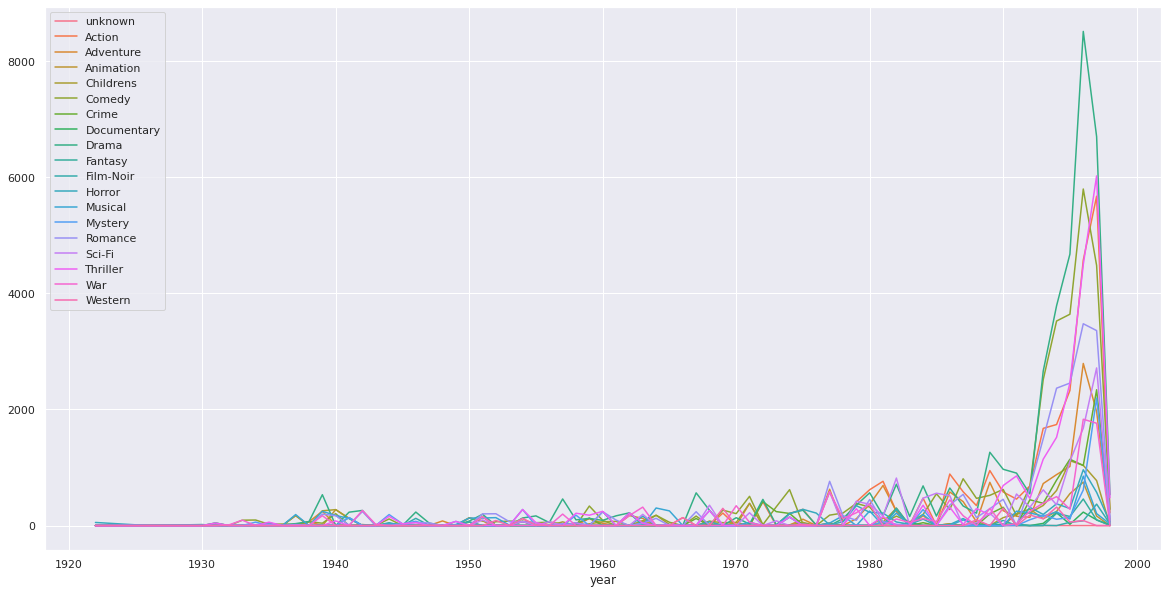

In [ ]:
# Data is merged with item based on movie id
df_Data_itemq8 = pd.merge(df_Data,df_item,how='inner',on='movie id')
#the above resultant dataframe is merged with user dataframe using user id
df_Data_item_userq8 = pd.merge(df_Data_itemq8,df_user,how='inner',on='user id')
#df_Data_item_user_year_genre = df_Data_item_userq8.drop(df_Data_item_userq8.columns.difference(['unknown',	'Action',	'Adventure',	'Animation',	'Childrens',	'Comedy',	'Crime',	'Documentary','Drama',	'Fantasy',	'Film-Noir',	'Horror',	'Musical',	'Mystery',	'Romance',	'Sci-Fi',	'Thriller',	'War',	'Western','year']), 1, inplace=True)
plt.figure(figsize=(20,10))
df_Data_item_user_year_genre = df_Data_item_userq8.loc[:, df_Data_item_userq8.columns.intersection(['unknown',	'Action',	'Adventure',	'Animation',	'Childrens',	'Comedy',	'Crime',	'Documentary','Drama',	'Fantasy',	'Film-Noir',	'Horror',	'Musical',	'Mystery',	'Romance',	'Sci-Fi',	'Thriller',	'War',	'Western','year'])]
#df_Data_item_user_year_genre_grouped = df_Data_item_user_year_genre.groupby(['year'],as_index=False)
#df_Data_item_user_year_genre_grouped
df_final = df_Data_item_user_year_genre.groupby('year')['unknown',	'Action',	'Adventure',	'Animation',	'Childrens',	'Comedy',	'Crime',	'Documentary','Drama',	'Fantasy',	'Film-Noir',	'Horror',	'Musical',	'Mystery',	'Romance',	'Sci-Fi',	'Thriller',	'War',	'Western'].agg('sum')
sns.lineplot(data=df_final, dashes=False)

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hints : 

1. Find the count of ratings and average ratings for every movie.
2. Slice the movies which have ratings more than 100.
3. Sort values according to average rating such that movie which highest rating is on top.
4. Select top 25 movies.
5. You will have to use the .merge() function to get the movie titles.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [7]:
df_Data_item = pd.merge(df_Data,df_item,how='inner',on='movie id')
df_Data_item_user = pd.merge(df_Data_item,df_user,how='inner',on='user id')


#graph = sns.barplot(x=top_movies.nlargest(25).index,y=top_movies.nlargest(25).values)
#graph.set_xticklabels(graph.get_xticklabels(),rotation = 90)
#getting top rated movies grouped by movie titles and compute its average rating 
top_movies = df_Data_item_user.groupby('movie title').agg({'rating':[np.size,np.mean]})
#sorted the movie titles in descending order
top_movies=top_movies.sort_values([('rating','size')],ascending=False)
#select the top 100 movies based on ratings and size
top_movies_100rating = top_movies.nlargest(100,[('rating','size')])
#select the top 25 movies which are highly rated
top_movies_100rating_25highest = top_movies_100rating.nlargest(25,[('rating','mean')])
top_movies_100rating_25highest

rating          
                                   size      mean
movie title                                      
Schindler's List                    298  4.466443
Casablanca                          243  4.456790
Shawshank Redemption, The           283  4.445230
Usual Suspects, The                 267  4.385768
Star Wars                           583  4.358491
One Flew Over the Cuckoo's Nest     264  4.291667
Silence of the Lambs, The           390  4.289744
Godfather, The                      413  4.283293
Raiders of the Lost Ark             420  4.252381
Titanic                             350  4.245714
Empire Strikes Back, The            367  4.204360
Princess Bride, The                 324  4.172840
Amadeus                             276  4.163043
L.A. Confidential                   297  4.161616
Fargo                               508  4.155512
Braveheart                          297  4.151515
Blade Runner                        275  4.138182
It's a Wonderful Life               231  4.121212
Graduate, The                       239  4.104603
Psycho                              239  4.100418
Wizard of Oz, The                   246  4.077236
Monty Python and the Holy Grail     316  4.066456
Pulp Fiction                        394  4.060914
Sting, The                          241  4.058091
Apocalypse Now                      221  4.045249

### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women

**compare the percentages**

1. Merge all the datasets

2. There is no need to conduct statistical tests around this. Just **compare the percentages** and comment on the validity of the above statements.

3. you might want ot use the .sum(), .div() function here.

4. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

M    72.40757
F    27.59243
Name: gender, dtype: float64
Since the percentage of Male is greater than Female in this case. We can say that Men Watch more Drama Movies than Women.


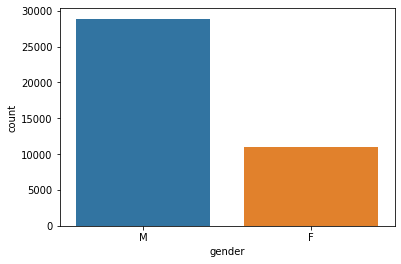

In [16]:
# getting the total number of people watched only drama genre
only_Drama_MenvWomen = df_Data_item_user.loc[df_Data_item_user['Drama'] == 1]
# get the percentage of people one who watches drama based on the gender
print(only_Drama_MenvWomen['gender'].value_counts(normalize=True)*100)
print("Since the percentage of Male is greater than Female in this case. We can say that Men Watch more Drama Movies than Women.")
# distribution of the counts using countplot based on the gender
sns.countplot(only_Drama_MenvWomen['gender']);


M    79.347997
F    20.652003
Name: gender, dtype: float64
Since the percentage of Male is greater than Female in this case. We can say that Men Watch more Sci-Fi Movies than Women.


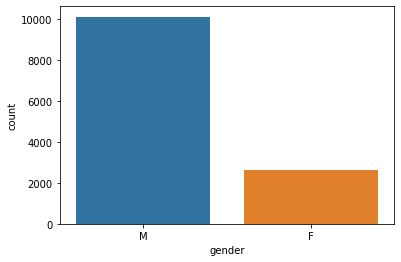

In [17]:
# getting the total number of people watched only SciFi genre
only_SciFi_MenvWomen = df_Data_item_user.loc[df_Data_item_user['Sci-Fi'] == 1]
# get the percentage of people one who watches SciFi  based on the gender
print(only_SciFi_MenvWomen['gender'].value_counts(normalize=True)*100)
print("Since the percentage of Male is greater than Female in this case. We can say that Men Watch more Sci-Fi Movies than Women.")
# distribution of the counts using countplot based on the gender
sns.countplot(only_SciFi_MenvWomen['gender']);

M    69.898772
F    30.101228
Name: gender, dtype: float64
Since the percentage of Male is greater than Female in this case. We can say that Men Watch more Romance Movies than Women.


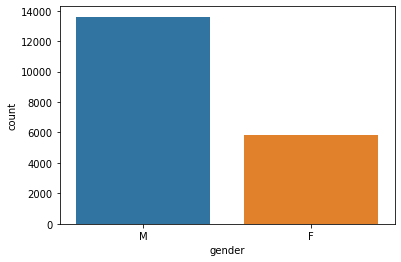

In [18]:
# getting the total number of people watched only Romance genre
only_Romance_MenvWomen = df_Data_item_user.loc[df_Data_item_user['Romance'] == 1]
# get the percentage of people one who watches romance based on the gender
print(only_Romance_MenvWomen['gender'].value_counts(normalize=True)*100)
print("Since the percentage of Male is greater than Female in this case. We can say that Men Watch more Romance Movies than Women.")
sns.countplot(only_Romance_MenvWomen['gender']);